# IKEA Furniture
This is a Kaggle data set (https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping) that was collected by web scraping the IKEA Saudi Aribia website: https://www.ikea.com/sa/en/cat/furniture-fu001/

the data was collected at 2020-04-20 (**27 Shaaban** 1441, Three days before Ramadan month).
which mean that the data was collected at the beginning of **Ramadan season**.

## Exploratory Analysis


### Importing pakcges & our data

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ikea = pd.read_csv("IKEA_SA_Furniture_Web_Scrapings_sss.csv", index_col = 0)
ikea.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


### Features Dictionary


- item_id: item id wich can be used later to merge with other IKEA dataframes.
- name: the commercial name of items.
- category: the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…).
- Price: the current price in Saudi Riyals.
- old_price: the price of item in Saudi Riyals before discount.
- sellable_Online: if the item is available for online purchasing or in-stores only (Binary).
- link: the web link of the item.
- other_colors: if other colors are available for the item, or just one color as displayed in the website (Binary).
- Short_description: a brief description of the item.
- designer: The name of the designer who designed the item.
- width: Width of the item in Centimeter.
- height: Height of the item in Centimeter.
- depth: Depth of the item in Centimeter.

### Exploring the data

In [3]:
ikea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


based on this summery, several issiues need to be investegated:
1. old_price Dtype is "opject", while it is expected to be "float64".
2. other_colors Dtype is "opject", while it is expected to be "bool"
3. The columns: depth, height and width have several missing values.

#### investegating each column

##### item_id  &  name columns

In [4]:
ikea.duplicated().sum()

0

In [5]:
ikea[["item_id", "name", "category", "designer"]].nunique()

item_id     2962
name         607
category      17
designer     381
dtype: int64

There is no duplicated (repeated) records, but yet there are duplicated item_ids. on the other hand, duplicated names are expected because the same item might has deferent sizes but that will not change its name.

In [6]:
ikea[ikea.item_id.duplicated()]
ikea[ikea.item_id == 30441554]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
784,30441554,TIMMERVIKEN,Bookcases & shelving units,115.0,No old price,True,https://www.ikea.com/sa/en/p/timmerviken-door-...,No,"Door, 60x64 cm",304.415.54 The door keeps your belongings hidd...,NaN,64.0,60.0
803,30441554,TIMMERVIKEN,Cabinets & cupboards,115.0,No old price,True,https://www.ikea.com/sa/en/p/timmerviken-door-...,No,"Door, 60x64 cm",304.415.54 The door keeps your belongings hidd...,NaN,64.0,60.0
3269,30441554,TIMMERVIKEN,TV & media furniture,115.0,No old price,True,https://www.ikea.com/sa/en/p/timmerviken-door-...,No,"Door, 60x64 cm",304.415.54 The door keeps your belongings hidd...,NaN,64.0,60.0


the repeated item_ids are due to that an item might be categorize in deferent categories in the same time.
Therfore such item was recorded once for each category.

##### price column

In [7]:
ikea.price.describe()

count    3694.000000
mean     1078.208419
std      1374.652494
min         3.000000
25%       180.900000
50%       544.700000
75%      1429.500000
max      9585.000000
Name: price, dtype: float64

##### old_price

In [8]:
ikea.old_price.value_counts()

No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 3,145           1
SR 39              1
SR 2,105           1
SR 752             1
SR 1,050           1
Name: old_price, Length: 365, dtype: int64

In [9]:
notdiscaunted = ikea[ikea.old_price == "No old price"].shape[0] 
print(f"{round(((ikea.shape[0] - notdiscaunted)/ikea.shape[0]) * 100, 2)}% of the items was discounted on 2020-04-20 (27 Shaaban 1441)")


17.7% of the items was discounted on 2020-04-20 (27 Shaaban 1441)


Notice that "No old price" mean that the old price of an item equal its current price.
therefore,in the cleaning prossece this column will be converted to a column of floats.  

##### other_colors

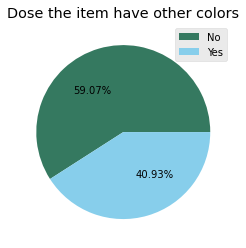

In [10]:
colorsOptions = ikea.other_colors.value_counts()
plt.style.use("ggplot")
percentage = [round( colorsOptions[0]/sum(colorsOptions) *100, 2), round(colorsOptions[1]/sum(colorsOptions) *100, 2)]

plt.pie(colorsOptions, labels= [f"{percentage[0]}%",f"{percentage[1]}%"] ,
    labeldistance=0.5, colors=["#357960", "skyblue"])

plt.title("Dose the item have other colors")     #b14e46
plt.legend(colorsOptions.index)

plt.show()

##### sellable_online

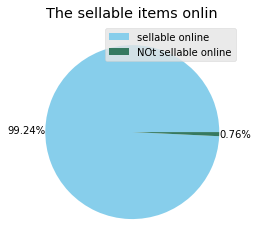

In [11]:
onlinOptions = ikea.sellable_online.value_counts()
plt.style.use("ggplot")
percentage = [round( onlinOptions[0]/sum(onlinOptions) *100, 2), round(onlinOptions[1]/sum(onlinOptions) *100, 2)]

plt.pie(onlinOptions, labels= [f"{percentage[True]}%",f"{percentage[False]}%"] ,
    labeldistance=1, colors=["skyblue", "#357960"])

plt.title("The sellable items onlin")
plt.legend(["sellable online", "NOt sellable online"])

plt.show()

##### designer

In [12]:
aa= ikea.designer.value_counts()
print(aa)

IKEA of Sweden                                                                                                                                                                                                                                                                                                                                                                                                                  828
Ehlén Johansson                                                                                                                                                                                                                                                                                                                                                                                                                 161
Francis Cayouette                                                                                                                                               

There are some troubling values in the desginer column, namly those with numbers at the beginning.

In [13]:
count=0
for i in aa.index:
    if i[0].isnumeric() :
        count +=1
print(f"{count} ({round((count/len(aa)) *100, 2)}%) of the unique values in the designer column are in fact long-descriptins of the items.")

102 (26.77%) of the unique values in the designer column are in fact long-descriptins of the items.


In [14]:
print("The most important designers are:")
print(aa[aa > 30])


The most important designers are:
IKEA of Sweden                    828
Ehlén Johansson                   161
Francis Cayouette                 151
Ola Wihlborg                      134
K Hagberg/M Hagberg               122
Jon Karlsson                      120
Carina Bengs                       75
Ehlén Johansson/IKEA of Sweden     75
Henrik Preutz                      70
IKEA of Sweden/Ehlén Johansson     70
Studio Copenhagen                  64
H Preutz/A Fredriksson             60
Ebba Strandmark                    57
K Malmvall/E Lilja Löwenhielm      55
Nike Karlsson                      53
Eva Lilja Löwenhielm               46
Tord Björklund                     31
Johan Kroon                        31
Name: designer, dtype: int64


still there is another priblem with this column which is "/".
For example, what is the deference between "Ehlén Johansson", "Ehlén Johansson/IKEA of Sweden" and "IKEA of Sweden/Ehlén Johansson"?
- If they are the same we need to combine them. If this was the case, should they be combined in "Ehlén Johansson" or in "IKEA of Sweden"?

##### category

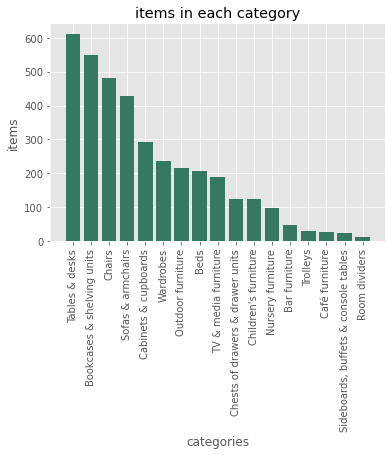

In [15]:
vcc = ikea.category.value_counts()


font = {'family': 'serif',
        'weight': 'normal',
        'size': 10,
        }


plt.bar(vcc.index, vcc, color="#357960" )
plt.xlabel("categories")
plt.xticks(rotation=90)
plt.ylabel("items")
plt.title("items in each category")


plt.show()

In [16]:
ikea.groupby("category")[["price"]].agg(["min","mean","max","std"]).apply(lambda x: round(x,2))


price                          
                                        min     mean     max      std
category                                                             
Bar furniture                          40.0   679.55  2375.0   604.60
Beds                                   30.0  1647.43  9585.0  1807.96
Bookcases & shelving units              3.0   519.42  4335.0   633.01
Cabinets & cupboards                    3.0   789.02  6480.0   987.91
Café furniture                        145.0   553.88  1385.0   384.32
Chairs                                 11.4  1048.93  6965.0  1304.62
Chests of drawers & drawer units       49.0   612.18  1880.0   450.98
Children's furniture                    5.0   272.76  1545.0   251.90
Nursery furniture                       5.0   393.66  1545.0   349.56
Outdoor furniture                       9.0   859.83  5144.0  1167.82
Room dividers                         189.0   932.00  2397.0   733.51
Sideboards, buffets & console tables  295.0  1068.09  2100.0   583.87
Sofas & armchairs                      27.0  2004.02  9585.0  2059.25
TV & media furniture                    3.0   659.05  4260.0   916.27
Tables & desks                          9.0  1129.40  6965.0  1305.21
Trolleys                               39.0   678.52  2295.0   658.90
Wardrobes                              45.0  2162.14  8380.0  1402.39

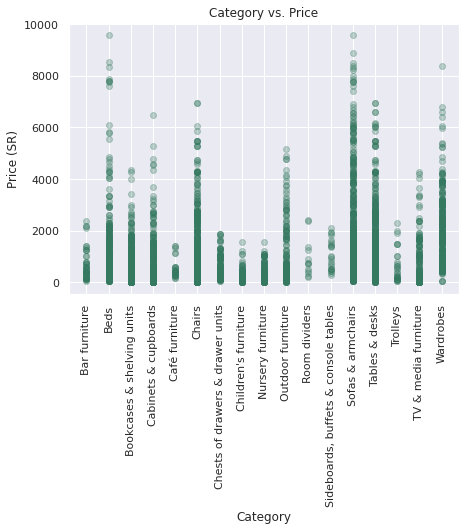

In [17]:
plt.figure(figsize=(7, 5))

plt.scatter(x="category",y="price", color="#357960",alpha= 0.3, data=ikea)

plt.ylabel("Price (SR)")
plt.xlabel("Category")
plt.xticks(rotation= 90)
plt.title("Category vs. Price")
plt.show()

##### size columns

In [18]:
print("the percentage of the missing values in each column are:")

ikea[["depth","height","width"]].isnull().sum() / ikea.shape[0] *100

the percentage of the missing values in each column are:


depth     39.604764
height    26.746075
width     15.944775
dtype: float64

In [19]:
ikea[["short_description", "depth", "height", "width"]].iloc[[3]]

,short_description,depth,height,width
3,"Bar stool with backrest, 74 cm",50.0,100.0,60.0


some records are like this one, the dimentions mentiened in the short_description do not match the dimentions in the size columns. This is why these columns are not trusted.

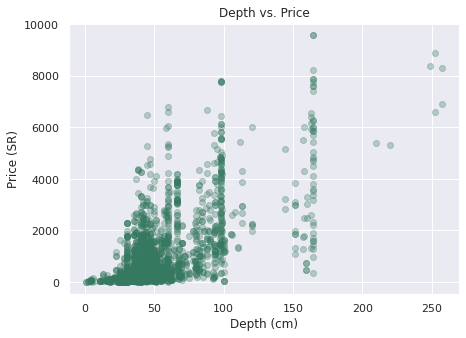

In [20]:
plt.scatter("depth","price",color="#357960",alpha= 0.3, data=ikea)
plt.ylabel("Price (SR)")
plt.xlabel("Depth (cm)")
plt.title("Depth vs. Price")
plt.show()

This graph emply that as the depth of an item increase, its pice incrrease.

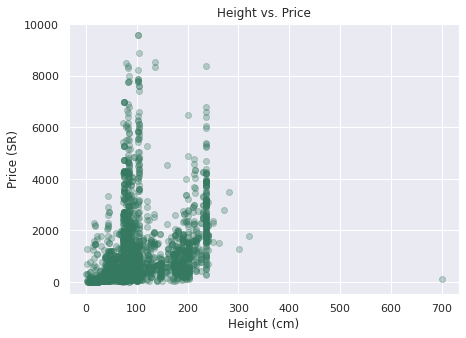

In [21]:
plt.scatter("height","price",color="#357960",alpha= 0.3, data=ikea)
plt.ylabel("Price (SR)")
plt.xlabel("Height (cm)")
plt.title("Height vs. Price")
plt.show()

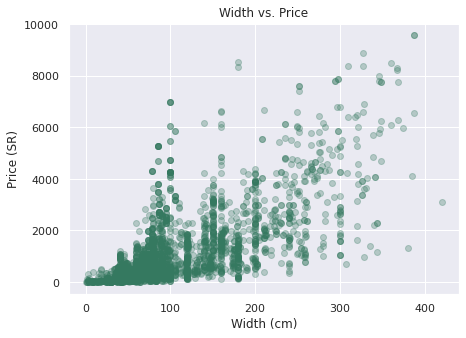

In [22]:
plt.scatter("width","price",color="#357960",alpha= 0.3, data=ikea)
plt.ylabel("Price (SR)")
plt.xlabel("Width (cm)")
plt.title("Width vs. Price")
plt.show()

This graph emply that as the width of an item increase, its pice incrrease.

### summery

- The columns: short_description, depth, height and width contradict eachother. Therefore they are excluded from the analysis.

- the number of items unsellable online is very small (28 items). Therefore, there is no need to investegate this column further.

- The most interesting questions that could be answered by our data are:
    
    1. what is the category with highest discounts in Ramadan season?
    
    2. how big is discaunts for Ramadan?



- inorder to answer these questions we need to clean old_sales column. 



## cleaning the old_price column

records with strange old_price

In [23]:
ikea[ikea.old_price.isin(["SR 50/4 pack"])]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
155,60299691,BRYNILEN,Beds,30.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/brynilen-leg-oak-...,No,"Leg, 10 cm",Ola Wihlborg,NaN,NaN,NaN
185,20299688,BRENNÅSEN,Beds,30.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/brennasen-leg-bla...,No,"Leg, 10 cm",Ola Wihlborg,7.0,NaN,7.0
191,40299687,BURFJORD,Beds,40.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/burfjord-leg-oak-...,No,"Leg, 10 cm",Ola Wihlborg,55.0,NaN,55.0
204,10309616,BÅTSFJORD,Beds,30.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/batsfjord-leg-bir...,No,"Leg, 10 cm",Ehlén Johansson,NaN,NaN,NaN
222,70299695,BJORLI,Beds,40.0,SR 50/4 pack,True,https://www.ikea.com/sa/en/p/bjorli-leg-stainl...,Yes,"Leg, 10 cm",Ola Wihlborg,NaN,NaN,NaN


In [24]:
ikea[["price", "old_price"]].head(11)

,price,old_price
0,265.0,No old price
1,995.0,No old price
2,2095.0,No old price
3,69.0,No old price
4,225.0,No old price
5,345.0,No old price
6,129.0,No old price
7,195.0,No old price
8,129.0,No old price
9,2176.0,"SR 2,375"


In [25]:
def to_floatt(x):

    if(x[1] != "No old price"):
        
        y= x[1].split()
        if y[1].isnumeric():
            return(float(y[1]))
        elif "," in y[1]:
            return(float("".join(y[1].split(","))))
        else: 
            print(y)
    else:
        return(x[0])



ikea.old_price = ikea[["price","old_price"]].apply(lambda x: to_floatt(x), axis= 1)

print("Those are the unexpected old_price values, (will be replaced by NaN)")

['SR', '50/4', 'pack']
['SR', '50/4', 'pack']
['SR', '50/4', 'pack']
['SR', '50/4', 'pack']
['SR', '50/4', 'pack']
['SR', '10/4', 'pack']
['SR', '445/2', 'pack']
['SR', '100/4', 'pack']
['SR', '175/2', 'pack']
['SR', '100/4', 'pack']
Those are the unexpected old_price values, (will be replaced by NaN)


In [26]:
ikea[["price", "old_price"]].head(11)

,price,old_price
0,265.0,265.0
1,995.0,995.0
2,2095.0,2095.0
3,69.0,69.0
4,225.0,225.0
5,345.0,345.0
6,129.0,129.0
7,195.0,195.0
8,129.0,129.0
9,2176.0,2375.0


## Analysis

In [27]:
ikea["discount_percentage"] = ikea[["price", "old_price"]].apply(lambda x: round((x[1] - x[0])/x[1] *100, 2), axis = 1)
ikea[["old_price", "price", "discount_percentage"]].head(10)

,old_price,price,discount_percentage
0,265.0,265.0,0.00
1,995.0,995.0,0.00
2,2095.0,2095.0,0.00
3,69.0,69.0,0.00
4,225.0,225.0,0.00
5,345.0,345.0,0.00
6,129.0,129.0,0.00
7,195.0,195.0,0.00
8,129.0,129.0,0.00
9,2375.0,2176.0,8.38


In [28]:
print(f"a discounted item is discounted on average by {round(ikea[ikea.discount_percentage > 0].discount_percentage.mean(), 2)}%")


a discounted item is discounted on average by 18.51%


In [29]:
ikea[ikea.discount_percentage > 0].groupby("category")[["discount_percentage"]].agg(["count","mean","max"]).apply(lambda x: round(x,2))


discount_percentage             
                                                   count   mean   max
category                                                             
Bar furniture                                          9  15.84  40.0
Beds                                                  45  16.13  40.0
Bookcases & shelving units                            79  18.43  40.0
Cabinets & cupboards                                  24  19.24  40.0
Café furniture                                         3  20.00  20.0
Chairs                                                68  17.09  40.0
Chests of drawers & drawer units                      53  19.16  30.0
Children's furniture                                   4  18.32  20.0
Nursery furniture                                      2  20.00  20.0
Outdoor furniture                                     40  25.23  40.0
Room dividers                                          5  23.67  40.0
Sideboards, buffets & console tables                   1  20.00  20.0
Sofas & armchairs                                    114  19.81  40.0
TV & media furniture                                  19  13.46  40.0
Tables & desks                                        94  16.67  40.0
Trolleys                                               2  35.00  40.0
Wardrobes                                             82  18.11  50.0

This table describes the discounted items in each category by showing:

- the number of discounted item(s) in each category under "count" column.
- the average discount percentage of the discounted item(s) in each category under "mean" column.
- the maximum discount percentage in each category.

## conclusion

Based on our data the holy month of Ramadan was a discounts season for IKEA in Saudi Arabia.
- 17.7% of the items was discaunted.
- on average a discounted item is discounted by 18.51%.

